# Gradient descent #



In [2]:
import matplotlib
import numpy as np
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import cm, lines, collections, colors

Let's code gradient descent on a quadratic example function $f(x,y) = a x^2 + y^2$ with $0 < a < 1$.

In [3]:
# Define the function

delta = 0.01 # spacing between samples in each dimension
x = np.arange(-5.0, 5.0, delta)
y = np.arange(-5.0, 5.0, delta)
X, Y = np.meshgrid(x, y)

epsilon_arr = [1,0.1,0.01,0.001]
epsilon = epsilon_arr[0]
Z = X**2+2*(1-epsilon)/(1+epsilon)*X*Y+Y**2 # f(x,y) for all x,y pairs



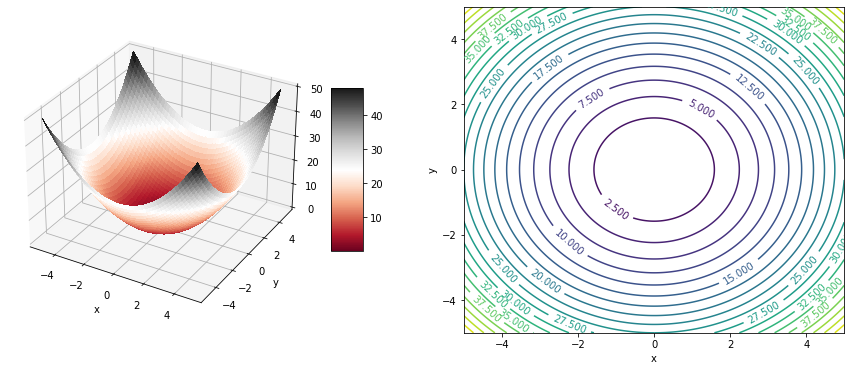

In [4]:
# Plot the functions
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122)


# Surface plot
surf = ax1.plot_surface(X, Y, Z, cmap=cm.RdGy, linewidth=0, antialiased=False)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
fig.colorbar(surf, ax=ax1, shrink=0.5, aspect=5)

# Contour plot
contours = ax2.contour(X, Y, Z, 20)
ax2.clabel(contours, inline=True, fontsize=10)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
plt.show()

In [23]:
# Define the gradient descent algorithm

# Starting point
x_0 = np.array([1.0, 1.0])

# Gradient
def gradient(v):
    # the 1st dimension is x, the 2nd dimension is y
    #grad = np.array([2*a*v[0], 2*v[1]])
    #grad = np.array([[2*v[0]+2*v[1]*(1-epsilon)/(1+epsilon)],
    #                 [2*v[0]*(1-epsilon)/(1+epsilon)+2*v[1]]])
    grad = np.array([2*v[0]+2*v[1]*(1-epsilon)/(1+epsilon),
                     2*v[0]*(1-epsilon)/(1+epsilon)+2*v[1]])
    return grad

# Step-size
#alpha = 0.01
m = 2-2*(1-epsilon)/(1+epsilon)
M = 2+2*(1-epsilon)/(1+epsilon)
alpha = m/2/M**2
# Tolerance
tolerance = 1e-6

# Gradient descent iteration
x_arr = []
x_arr += [list(x_0)]
x = x_0
lines = []
for ii in range(1000):   
    step = -alpha * gradient(x)
    if np.all(np.abs(step) <= tolerance):
        break
    x_prime = x + step
    x_arr += [list(x_prime)]
    lines.append([x.tolist(), x_prime.tolist()])
    x = x_prime
    
print(f'Final iterate = {x}.')
print(f'Number of iterations = {ii}.')

Final iterate = [1.90734863e-06 1.90734863e-06].
Number of iterations = 19.


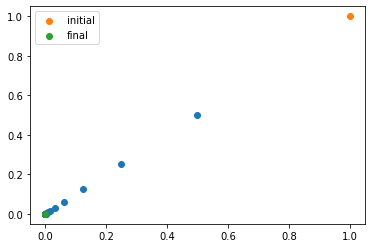

In [37]:
x_point = np.array(x_arr)
plt.scatter(x_point[1:-1,0],x_point[1:-1,1])
plt.scatter(x_point[0,0],x_point[0,1],label='initial')
plt.scatter(x_point[-1,0],x_point[-1,1],label='final')
plt.legend()

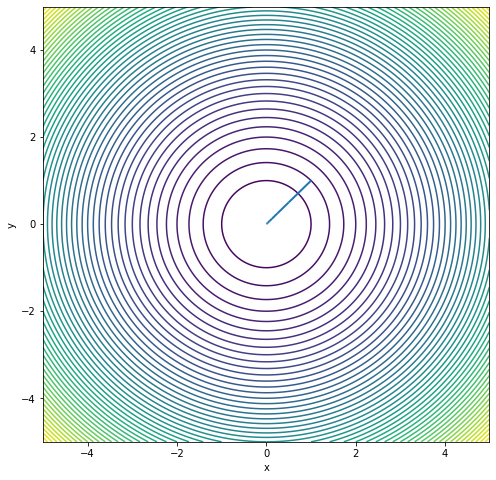

In [6]:
# Contour plot again with descent dynamics
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()

contours = ax.contour(X, Y, Z, 50)

# test a plain-ol-line
# lines = [[x.tolist(), (1,1)], [[1,1], [-1,0]]]
lc = collections.LineCollection(lines,linewidths=2)
ax.add_collection(lc)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

In [44]:
# Define the gradient descent algorithm
def _func(epsilon):
    # Starting point
    x_0 = np.array([1.0, 1.0])

    # Gradient
    def gradient(v):
        # the 1st dimension is x, the 2nd dimension is y
        #grad = np.array([2*a*v[0], 2*v[1]])
        #grad = np.array([[2*v[0]+2*v[1]*(1-epsilon)/(1+epsilon)],
        #                 [2*v[0]*(1-epsilon)/(1+epsilon)+2*v[1]]])
        grad = np.array([2*v[0]+2*v[1]*(1-epsilon)/(1+epsilon),
                         2*v[0]*(1-epsilon)/(1+epsilon)+2*v[1]])
        return grad
    def func_eval(v):
        x,y = v[0],v[1]
        val = x**2+2*(1-epsilon)/(1+epsilon)*x*y+y**2
        return val

    # Step-size
    #alpha = 0.01
    m = 2-2*(1-epsilon)/(1+epsilon)
    M = 2+2*(1-epsilon)/(1+epsilon)
    alpha = m/2/M**2
    # Tolerance
    tolerance = 1e-6

    # Gradient descent iteration
    x_arr = []
    x_arr += [list(x_0)]
    x = x_0
    lines = []
    val = []
    val += [func_eval(x_0)]
    for ii in range(1000):   
        step = -alpha * gradient(x)
        if np.all(np.abs(step) <= tolerance):
            break
        x_prime = x + step
        x_arr += [list(x_prime)]
        val += [func_eval(x_prime)]
        lines.append([x.tolist(), x_prime.tolist()])
        x = x_prime
    
    print(f'Final iterate = {x}.')
    print(f'Number of iterations = {ii}.')
    return x_arr,lines,val

In [45]:
a,b,c = _func(1)

Final iterate = [1.90734863e-06 1.90734863e-06].
Number of iterations = 19.


In [56]:
np.arange(len(c))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

([<matplotlib.axis.XTick at 0x7fda5fb78850>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

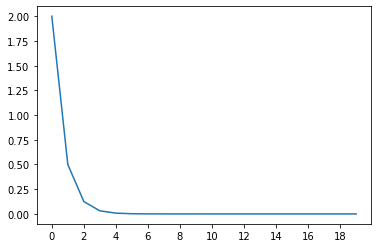

In [67]:
plt.plot(np.int32(np.arange(len(c))),c)
plt.xticks(np.arange(0,len(c),2))